# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [13]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set

In [14]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset?


In [15]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 1595 observations.

#### Question 2. Create a summary table.

In [16]:
df_raw.describe()# function

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE would have a larger STD than GPA because of the dispertion of the data.

#### Question 4. Drop data points with missing data.


In [18]:
df_raw.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [20]:
len(df_raw.dropna())

397

#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: By using the function len(). It gives len(df_raw.dropna()).

#### Question 6. Create box plots for GRE and GPA.

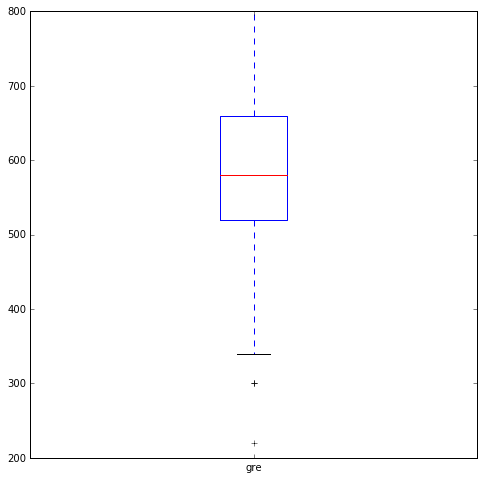

In [13]:
df_raw.gre.plot(kind = 'box', figsize = (8, 8))# boxplot 1

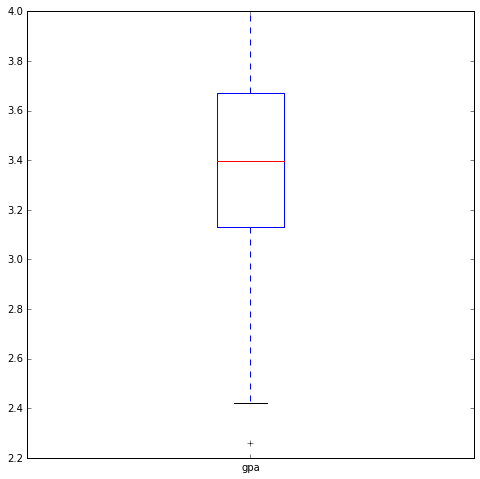

In [12]:
df_raw.gpa.plot(kind = 'box', figsize = (8, 8))# boxplot 2

#### Question 7. What do this plots show?

Answer: It shows the min, max, first quartile (25%), second quartile (50%), third quartile (75%) with 2 outliers for GRE and 1 outlier for GPA.

#### Question 8. Describe each distribution.

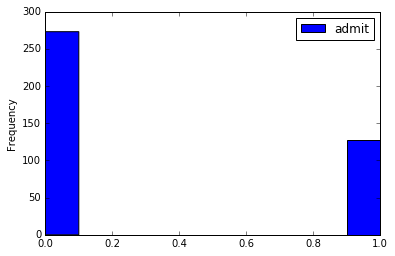

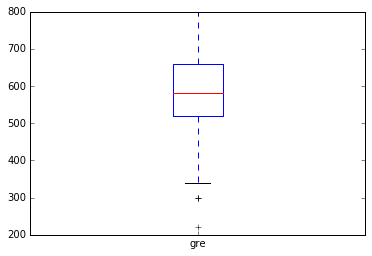

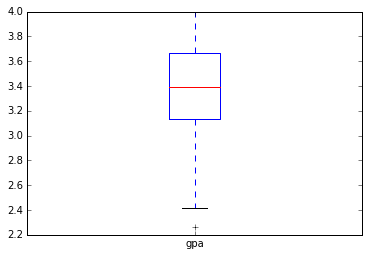

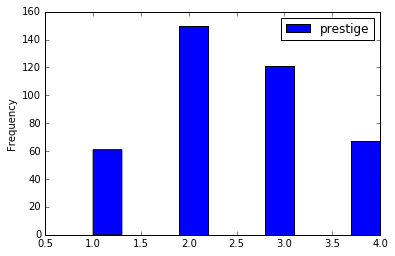

In [21]:
df_raw[['admit']].plot(kind = 'Hist')
df_raw[['gre']].plot(kind = 'box')
df_raw[['gpa']].plot(kind = 'box')
df_raw[['prestige']].plot(kind = 'Hist')

# plot the distribution of each variable

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: For the GRE distribution, we yes but not really for the GPA distribution since it's skewed to the top in our box plot.

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer: The correction we could do is on the outliers (2 for GRE and 1 for GPA) that could impact the analysis of our data. To do that correction, we would use the function .drop().

#### Question 11. Which of our variables are potentially colinear?

In [15]:
df_raw.corr()# create a correlation matrix for the data


,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA are positively correlated with the admission, but very little (0.183 and 0.176) ; so having good GPA and GPA helps a bit to get admitted. The prestige is negatively correlated with the admission so, it will go on the opposite way ; if the prestige is high, it will impact negatively the admission (-0.24).

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: The prestige is negatively correlated with the admission so, the grad school admissions rates and the prestige of undergraduate schools will go on the opposite way ; if the prestige is high, it will impact negatively the admission (-0.24).

#### Question 14. What is your hypothesis?

Answer: The hypothesis of this analysis is that the grad school will consider the GRE and GPA "good factors" to process the admissions. The prestige of undergraduate schools will be a "negative" thing. We can do the hypothesis that the admissions are made regarding what students have provided (in term of "efforts"). We don't have the data for job experience but we can do the assumtion that it must be pretty relevant/important regarding admissions.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

#### 2. Bonus: Log transform the skewed data.

#### 3. Advanced: Impute missing data.